📌 Key Concepts

Too small LR (e.g., 0.001) → Slow convergence, takes too long.

Optimal LR (e.g., 0.1) → Fast and smooth convergence.

Too large LR (e.g., 1.0) → Overshooting, loss may never stabilize.

In [5]:
import torch

import matplotlib.pyplot as plt

In [6]:
# Sample dataset

x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[5.0], [7.0], [9.0], [11.0]])

In [7]:
learning_rate = [0.01, 0.1,1.0, 10]

epochs= 100

loss_histories = {}

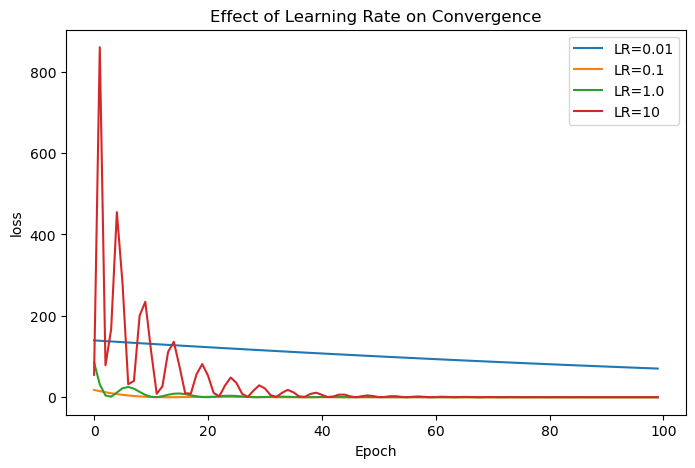

In [8]:
for lr in learning_rate:

    # Initialize model parameters

    w = torch.randn(1, requires_grad=True)
    b = torch.randn(1, requires_grad=True)


    optimizer = torch.optim.Adam([w,b], lr=lr)


    loss_history = []

    for epoch in range(epochs):

        y_pred = w * x + b # Forward pass

        loss = ((y_pred - y) ** 2).mean()  # Compute Loss


        optimizer.zero_grad()  # Reset gradients

        loss.backward()

        optimizer.step()  # Update parameters


        loss_history.append(loss.item()) # Store loss values
    
    loss_histories[lr] = loss_history # Store loss for each LR



# 📊 Plot Loss Curves

plt.figure(figsize=(8,5))

for lr, loss_history in loss_histories.items():

    plt.plot(loss_history, label=(f'LR={lr}'))


plt.xlabel('Epoch')

plt.ylabel('loss')

plt.title("Effect of Learning Rate on Convergence")

plt.legend()

plt.show()


✅ Observations

LR = 0.001: Converges very slowly.

LR = 0.01: Converges well.

LR = 0.1: Converges quickly, but may oscillate slightly.

LR = 1.0: Unstable, loss may not decrease.